In [1]:
# imports
import pandas as pd
import rdflib
from rdflib import Graph, Literal, Namespace, RDF, URIRef, OWL
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph
from rdflib.namespace import DC, FOAF
import matplotlib.pyplot as plt
import numpy as np
import networkx.algorithms.community as nx_comm
import networkx as nx
from owlready2 import *


* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [2]:
from owlready2 import get_ontology
onto = get_ontology("http://example.org/medsur.owl")

In [3]:
class Patient(Thing):
    namespace = onto
    
""" Create Classes and properties of patient Characteristcs""" 
# ---------------------------------------------  
# class OlderThan65(Thing):
#     namespace = onto

# class Between45And65(Thing):
#     namespace = onto
    
# class Between25And45(Thing):
#     namespace = onto

# class Between18And25(Thing):
#     namespace = onto
    
class hasAgeGroup(ObjectProperty):                  # TODO: do we need to define ranges for our properties?
    domain = [Patient]
    range = [str]
    namespace = onto
 
# ---------------------------------------------   
class hasGender(ObjectProperty):
    domain = [Patient]
    range = [str]
    namespace = onto

# ---------------------------------------------       
# class Obese(Thing):
#     namespace = onto
    
# class Overweight(Thing):
#     namespace = onto
    
# class NormalWeight(Thing):
#     namespace = onto

# class Underweight(Thing):
#     namespace = onto

class hasWeightGroup(ObjectProperty):   # is this range correct if we connect patient directly to weightgroup is rdf tripple, else delete range
    domain = [Patient]
    range = [str]
    namespace = onto


"""Create Classes and Properties of Symptoms"""   
# class SOCCode(Thing):
#     namespace = onto
    
# class SOCName(Thing):
#     namespace = onto                                        
    
# class SOCAbbr(Thing):
#     namespace = onto
#     equivalent_to = [SOCCode, SOCName]

class hasSOC(ObjectProperty):
    domain = [Patient]
    namespace = onto
     
   
# # High Level Group Term
# class HLTGCode(Thing):
#     namespace = onto
    
# class HLTGName(Thing):
#     namespace = onto
#     equivalent_to = [HLTGCode]
    
class hasHLTG(ObjectProperty):
    domain = [Patient]
    namespace = onto
   
    
# # High Level Term
# class HLTCode(Thing):
#     namespace = onto
    
# class HLTName(Thing):
#     namespace = onto
    
# class PSD(Thing): # Primary Source Describtion
#     namespace = onto
#     equivalent_to = [HLTCode]
    
class hasHLT(ObjectProperty):
    domain = [Patient]
    namespace = onto	
   
    
# # Preferred Term
# class PTCode(Thing):
#     namespace = onto
    
# class PTName(Thing):
#     namespace = onto
#     equivalent_to = [PTCode]
    
class hasPT(ObjectProperty):
    domain = [Patient]
    namespace = onto


# # Lowest Level Term  
# class LLTCode(Thing):
#     namespace = onto

# class LLTName(Thing):
#     namespace = onto
#     equivalent_to = [LLTCode]
    
class hasLLT(ObjectProperty):
    domain = [Patient]
    namespace = onto
    

"""Create Classes and Properties of Compound"""
class Drug(Thing):
    namespace = onto 
    
class isGivenDrug(ObjectProperty):
    domain = [Patient]
    range = [Drug]
    namespace = onto
       
class hasDrugName(ObjectProperty):
    domain = [Drug]
    range = [str]
    namespace = onto
      
# class GenericDrugName(Thing):
#     namespace = onto
#     equivalent_to = [ATCText, ATCCode]                      

class isOfDosis(ObjectProperty):
    domain = [Drug]
    range = [str]                                 
    namespace = onto
       
class isOfType(ObjectProperty):
    domain = [Drug]
    range = [str]
    namespace = onto
     

"""Create Classes and Properties of Outcome"""	    
class hasOutcome(ObjectProperty):
    domain = [Patient]
    range = [str]
    namespace = onto
    
# class Outcome(Thing):
#     namespace = onto

In [4]:
# load medsur data from output_opiod.xlsx
import pandas as pd
data = pd.read_excel('output_opioid.xlsx')
data.head()

,Unnamed: 0,ID,WorldwideUniqueCaseIdentification,Status,Category,BodyWeight,Height,BMI,BMIGroup,date_received,...,HLTGName,SOCCode,SOCName,SOCAbbreviation,IsCurrent,IsDefaultSOC,Primary Source Description,summary,narrative,Dosage
0,0,1,CF-NL-09-249,40,NaN,NaN,NaN,NaN,NaN,2009-12-14,...,Psychiatric disorders NEC,10037175,Psychiatric disorders,Psych,1,1,she had become dependant of pain killers and s...,Automatic summary of the report by the Netherl...,The following information was published in the...,50MG
1,1,2,CF-NL-09-249,40,NaN,NaN,NaN,NaN,NaN,2009-12-14,...,Therapeutic and nontherapeutic effects (excl t...,10018065,General disorders and administration site cond...,Genrl,1,1,paracetamol and codeine no longer sufficiently...,Automatic summary of the report by the Netherl...,The following information was published in the...,50MG
2,2,3,ES-KYOWAKIRIN-2019BKK009955,40,NaN,NaN,NaN,NaN,NaN,2019-06-19,...,Parathyroid gland disorders,10014698,Endocrine disorders,Endo,1,0,Hypercalcemia,NaN,Case reference number 2019BKK009955 is a solic...,100UG/DO
3,3,4,ES-KYOWAKIRIN-2019BKK009955,40,NaN,NaN,NaN,NaN,NaN,2019-06-19,...,Deliria (incl confusion),10037175,Psychiatric disorders,Psych,1,1,Disorientation,NaN,Case reference number 2019BKK009955 is a solic...,100UG/DO
4,4,5,ES-KYOWAKIRIN-2019BKK009955,40,NaN,NaN,NaN,NaN,NaN,2019-06-19,...,"Bone, calcium, magnesium and phosphorus metabo...",10027433,Metabolism and nutrition disorders,Metab,1,1,Hypercalcemia,NaN,Case reference number 2019BKK009955 is a solic...,100UG/DO


In [5]:
onto.save(file = "medsur.rdf", format = "rdfxml") 
g = rdflib.Graph()
g.parse("medsur.rdf", format="xml")

# Loop through each triple in the graph (subj, pred, obj)
for subj, pred, obj in g:
    # Check if there is at least one triple in the Graph
    if (subj, pred, obj) not in g:
       raise Exception("It better be!")

# Print the number of "triples" in the Graph
print(f"Graph g has {len(g)} statements.")

Graph g has 39 statements.


In [6]:
# add RDF triples to the ontology
EX = rdflib.Namespace("http://example.org/medsur.rdf#")

# only select first row of data
data = data[:1]

# change all values in column "ID" to string
data= data.astype(str)

for index, row in data.iterrows():
    #patient = EX[row['ID']]
    
    patient = URIRef(EX, row['ID'])                      # check whether this is correct, do we have to add thing
    g.add((patient, RDF.type, EX.Patient))               # TODO: check whether this is enough
    
    # TODO: check whether we have to add the class agegroup to the ontology
    #g.add((patient, EX.hasAgeGroup, data["AgeGroup"]))                # maybe with if statement to filter on groups, groups may need to be defined in ontology
    
    # select age group
    if float(row["age_year"]) >= 65:
        g.add((patient, EX.hasAgeGroup, Literal("65+")))    
    elif float(row["age_year"]) >= 45:
        g.add((patient, EX.hasAgeGroup, Literal("45-65")))   
    elif float(row["age_year"]) >= 25:
        g.add((patient, EX.hasAgeGroup, Literal("25-45")))    
    elif float(row["age_year"]) >= 18:
        g.add((patient, EX.hasAgeGroup, Literal("18-25")))
       
    # TODO: do we have to do somethingh with the class weightgroup? or can we just use the data property?    
    if float(row["BMI"]) >= 30:
        g.add((patient, EX.hasWeightGroup, Literal("Obese")))
    elif float(row["BMI"]) >= 25:
        g.add((patient, EX.hasWeightGroup, Literal("Overweight")))
    elif float(row["BMI"]) >= 18.5:
        g.add((patient, EX.hasWeightGroup, Literal("Normal")))
    elif float(row["BMI"]) < 18.5:
        g.add((patient, EX.hasWeightGroup, Literal("Underweight")))
    
    if row["sex"] == "male" or row["sex"] == "female":
        g.add((patient, EX.hasGender, Literal(row["sex"])))
    
    if row["Outcome"] != "Unknown":    
        g.add((patient, EX.hasOutcome, Literal(row["Outcome"])))
    
                                                                            # TODO: how to do the equivalent classes
    g.add((patient, EX.hasPT, Literal(row["PTCode"])))
    g.add((patient, EX.hasHLT, Literal(row["HLTCode"])))
    g.add((patient, EX.hasHLTG, Literal(row["HLTGCode"])))
    g.add((patient, EX.hasLLT, Literal(row["LLTCode"])))
    
    #g.add((patient, EX.isGiven, EX.Compound))                              # TODO: are overkoepelende classes handig? or can we link directly?
    g.add((patient, EX.isGivenDrug, Literal(row["ATCode"])))
    g.add((Literal(row["ATCode"]), EX.hasDrugName, Literal(row["ATCText"])))
    g.add((Literal(row["ATCode"]), EX.isGivenDosis, Literal(row["Dosis"])))
    g.add((Literal(row["ATCode"]), EX.isGivenType, Literal(row["Type"])))
    
# print all the triples in the graph 
for s, p, o in g:
    print(s, p, o)
    


http://example.org/medsur.owl#hasAgeGroup http://www.w3.org/2000/01/rdf-schema#range http://www.w3.org/2001/XMLSchema#string
http://example.org/medsur.owl#hasGender http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#ObjectProperty
http://example.org/medsur.owl#hasWeightGroup http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#ObjectProperty
http://example.org/medsur.owl#hasAgeGroup http://www.w3.org/2000/01/rdf-schema#domain http://example.org/medsur.owl#Patient
http://example.org/medsur.owl#hasPT http://www.w3.org/2000/01/rdf-schema#domain http://example.org/medsur.owl#Patient
http:/example.org/medsur.rdf# http://example.org/medsur.rdf#hasPT 10013663
http://example.org/medsur.owl#hasLLT http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#ObjectProperty
http://example.org/medsur.owl#hasHLT http://www.w3.org/2000/01/rdf-schema#domain http://example.org/medsur.owl#Patient
http://example.org/medsur.owl#hasSOC h

In [7]:
nx_graph = rdflib_to_networkx_digraph(g)
list(nx_graph.nodes())

[rdflib.term.URIRef('http://example.org/medsur.owl#hasAgeGroup'),
 rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string'),
 rdflib.term.URIRef('http://example.org/medsur.owl#hasGender'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#ObjectProperty'),
 rdflib.term.URIRef('http://example.org/medsur.owl#hasWeightGroup'),
 rdflib.term.URIRef('http://example.org/medsur.owl#Patient'),
 rdflib.term.URIRef('http://example.org/medsur.owl#hasPT'),
 rdflib.term.URIRef('http:/example.org/medsur.rdf#'),
 rdflib.term.Literal('10013663'),
 rdflib.term.URIRef('http://example.org/medsur.owl#hasLLT'),
 rdflib.term.URIRef('http://example.org/medsur.owl#hasHLT'),
 rdflib.term.URIRef('http://example.org/medsur.owl#hasSOC'),
 rdflib.term.URIRef('http://example.org/medsur.owl#hasHLTG'),
 rdflib.term.Literal('N02AX02'),
 rdflib.term.Literal('CAPSULE'),
 rdflib.term.URIRef('http://example.org/medsur.owl#isOfDosis'),
 rdflib.term.Literal('10012337'),
 rdflib.term.Literal('TRAMADOL'),
 rdflib.term.UR

In [8]:
print("Number of Nodes: {n}".format(n=nx.number_of_nodes(nx_graph)))
print("Number of Edges: {n}".format(n=nx.number_of_edges(nx_graph)))
print("Density of Graph: {n}".format(n=nx.density(nx_graph)))

Number of Nodes: 33
Number of Edges: 50
Density of Graph: 0.04734848484848485


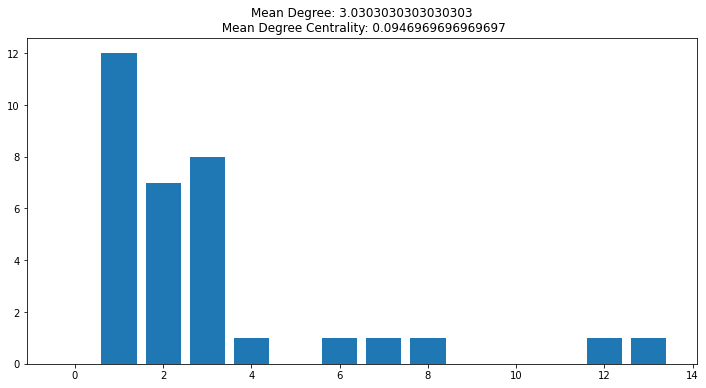

In [9]:
import matplotlib.pyplot as plt
import numpy as np

histdegree = pd.DataFrame(nx.degree_histogram(nx_graph))
degree = dict(nx.degree(nx_graph))


mean_degree = np.mean(list(degree.values()))
mean_degree_centrality = np.mean(list(nx.degree_centrality(nx_graph).values()))

fig, ax = plt.subplots(figsize=(12,6)) 
ax.bar(histdegree.index.values,histdegree[0])

plt.title("Mean Degree: {n1}\n Mean Degree Centrality: {n2}".format(n1=mean_degree,n2=mean_degree_centrality))
plt.show()

In [10]:
def find_Blank_nodes(nx_obj):
    blank_nodes = []
    count = 0
    for i in range(len(list(nx_obj.nodes()))):
        text = str(list(nx_obj.nodes())[i])
        #if node has URI is not blank
        if re.search('http',text):

            count += 0
        #if node has not URI is a blank node    
        else: 
            count += 1
            blank_nodes.append(text)

    print(f'There are {count} BlankNodes. \n And they are:\n {blank_nodes}')
    return count, blank_nodes

count, blank_nodes = find_Blank_nodes(nx_graph)

There are 10 BlankNodes. 
 And they are:
 ['10013663', 'N02AX02', 'CAPSULE', '10012337', 'TRAMADOL', '50MG', 'female', '10079102', '25-45', '10037176']


In [11]:
print("Clustering coefficient: {n}".format(n=nx.average_clustering(nx_graph)))
print(nx.degree_centrality(nx_graph))

Clustering coefficient: 0.0
{rdflib.term.URIRef('http://example.org/medsur.owl#hasAgeGroup'): 0.09375, rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string'): 0.21875, rdflib.term.URIRef('http://example.org/medsur.owl#hasGender'): 0.09375, rdflib.term.URIRef('http://www.w3.org/2002/07/owl#ObjectProperty'): 0.40625, rdflib.term.URIRef('http://example.org/medsur.owl#hasWeightGroup'): 0.09375, rdflib.term.URIRef('http://example.org/medsur.owl#Patient'): 0.375, rdflib.term.URIRef('http://example.org/medsur.owl#hasPT'): 0.0625, rdflib.term.URIRef('http:/example.org/medsur.rdf#'): 0.25, rdflib.term.Literal('10013663'): 0.03125, rdflib.term.URIRef('http://example.org/medsur.owl#hasLLT'): 0.0625, rdflib.term.URIRef('http://example.org/medsur.owl#hasHLT'): 0.0625, rdflib.term.URIRef('http://example.org/medsur.owl#hasSOC'): 0.0625, rdflib.term.URIRef('http://example.org/medsur.owl#hasHLTG'): 0.0625, rdflib.term.Literal('N02AX02'): 0.125, rdflib.term.Literal('CAPSULE'): 0.03125, rdflib.ter

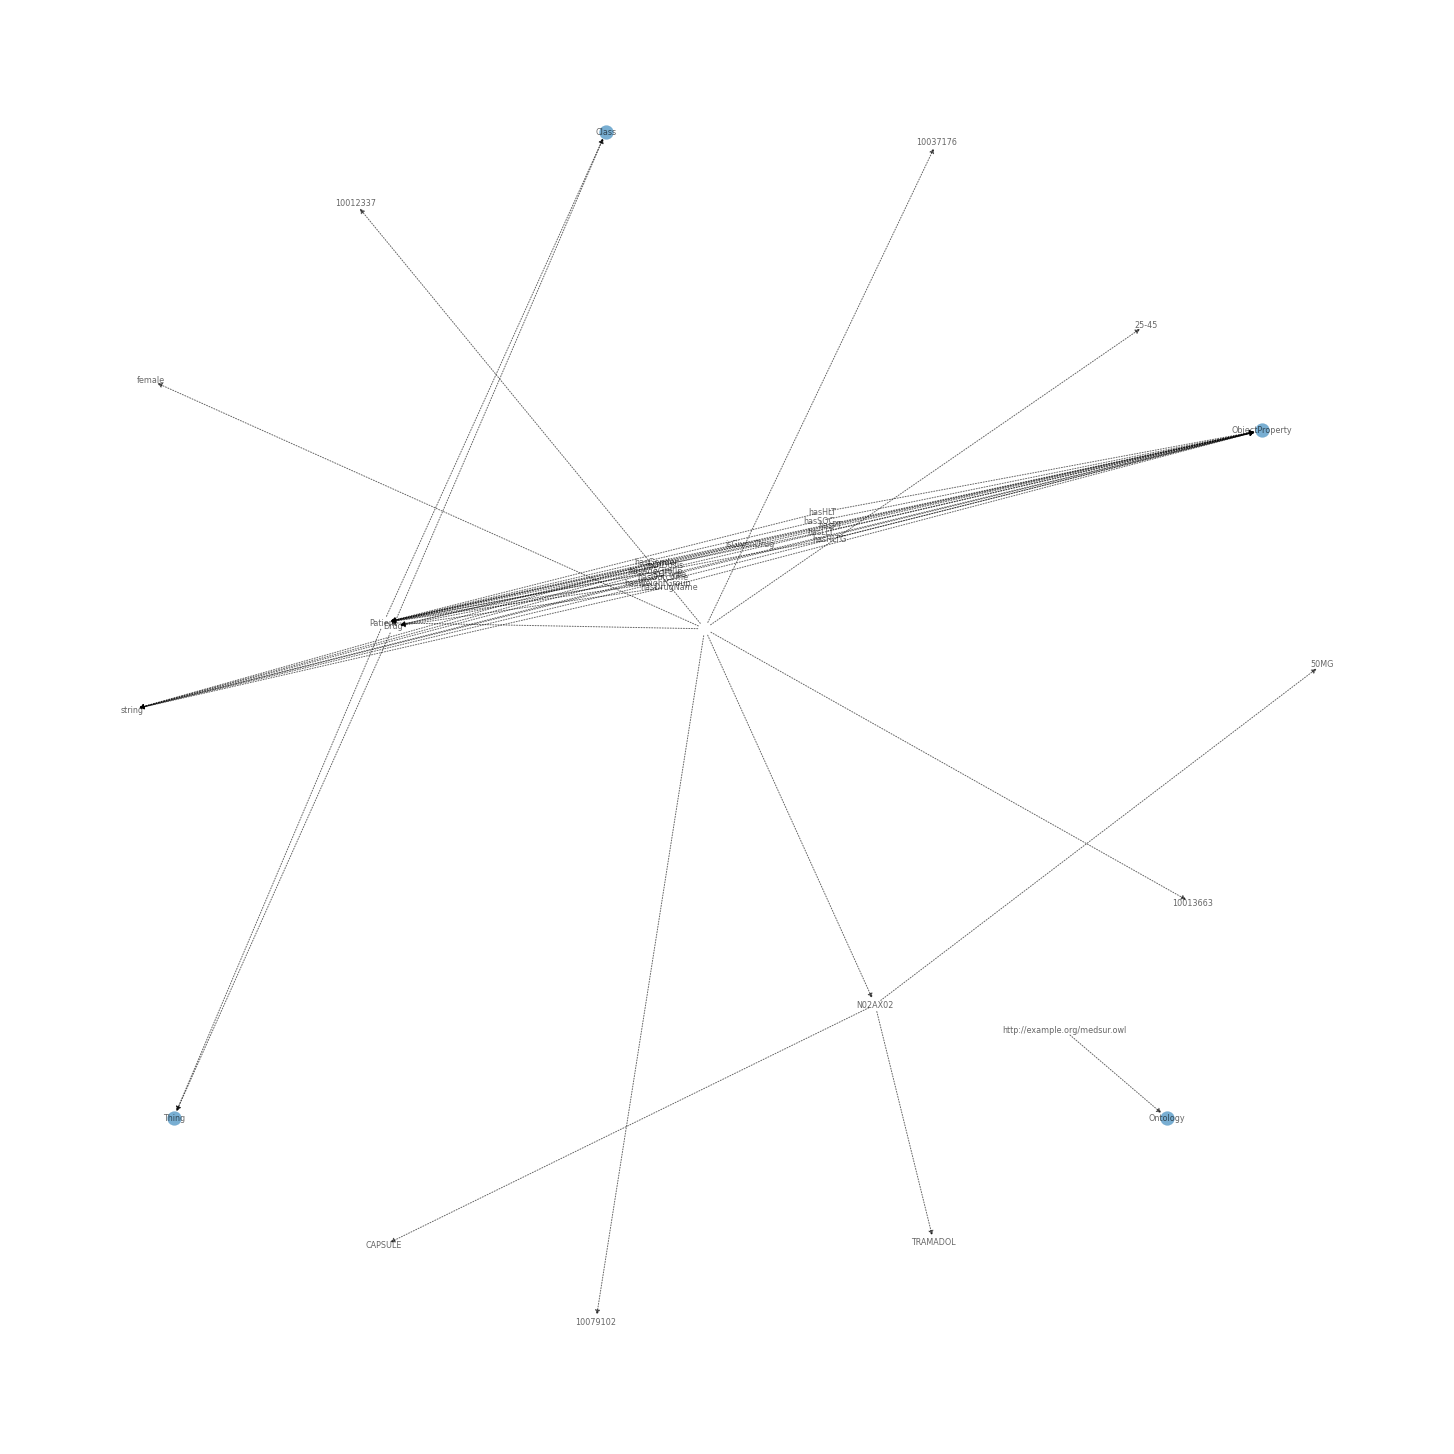

In [12]:
#rename the columns
import pandas as pd
import matplotlib.pyplot as plt

mapping = pd.DataFrame(nx_graph.nodes())
mapping['new_names'] = mapping[0].str.split("#",n=1,expand=False)
mapping['label'] = 'NA'

mapping_copy = mapping.copy()

for ind, m in mapping_copy.iterrows():
    l = len(m['new_names'])
    names = m['new_names']
    mapping.loc[ind,'label'] = names[l-1]
#this just helps us to have the readable names and not the URIs    
map_dict = dict(zip(mapping[0],mapping['label']))

#we indeed re-label the nodes of the graph
nx_graph_nl = nx.relabel_nodes(nx_graph,map_dict,copy=True)

#we decide to color the owl properties (in this way we have the ontology interacting with the instantiated KG)
owl_classes = [str(mapping.new_names[i][1])  for i in range(len(mapping.new_names)) if re.search('http://www.w3.org/2002/07/',mapping.new_names[i][0] )]

# make sure fig size is large
fig = plt.figure(figsize=(20,20))
pos = nx.circular_layout(nx_graph_nl)

#this is quite messy as our KG is pretty big and networkx visualization tools are not known to be the best around
nx.draw(nx_graph_nl,
                 with_labels=True, nodelist = owl_classes,
                node_size=200, font_size=8,alpha=0.6,linewidths=0.1,style=':' )